In [34]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
from afinn import Afinn
import numpy as np
import pandas as pd

from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from collections import Counter
import itertools

from nltk.corpus import stopwords
import string
from nltk import wordpunct_tokenize
from nltk.tag import *

from nltk.stem.lancaster import LancasterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

from wordcloud import WordCloud

In [4]:
#leggo il dataset con pandas
df = pd.read_csv('reviews_small_timed.csv')
df.head()

,productid,userid,profile,helpfulNum,helpfulDen,score,text,time,year
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,I have bought several of the Vitality canned d...,2011-04-27,2011
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,2012
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,This is a confection that has been around a fe...,2008-08-18,2008
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,If you are looking for the secret ingredient i...,2011-06-13,2011
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy at a great price. There was a wid...,2012-10-21,2012


In [5]:
#Convert all reviews in lower case
text = df['text']
df['text'] = list(map(lambda x: x.lower(), text))
df.head()

,productid,userid,profile,helpfulNum,helpfulDen,score,text,time,year
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,i have bought several of the vitality canned d...,2011-04-27,2011
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,product arrived labeled as jumbo salted peanut...,2012-09-07,2012
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,this is a confection that has been around a fe...,2008-08-18,2008
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,if you are looking for the secret ingredient i...,2011-06-13,2011
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,great taffy at a great price. there was a wid...,2012-10-21,2012


In [6]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

#de-contract words
def clean(text):
  text = text.split()
  new_text = []
  for word in text:
    if word in contractions:
      new_text.append(contractions[word])
    else:
      new_text.append(word)
  text = " ".join(new_text)
  return text
      
clean_text = []
for text in df.text:
   clean_text.append(clean(text))
df['clean_text'] = clean_text
df.head()

,productid,userid,profile,helpfulNum,helpfulDen,score,text,time,year,clean_text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,i have bought several of the vitality canned d...,2011-04-27,2011,i have bought several of the vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,product arrived labeled as jumbo salted peanut...,2012-09-07,2012,product arrived labeled as jumbo salted peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,this is a confection that has been around a fe...,2008-08-18,2008,this is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,if you are looking for the secret ingredient i...,2011-06-13,2011,if you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,great taffy at a great price. there was a wid...,2012-10-21,2012,great taffy at a great price. there was a wide...


In [7]:
#Let's tokenize the reviews using word_tokenize from nltk
df['tokenized'] = df.apply(lambda row: word_tokenize(row['text']), axis=1)
df['tokenized_clean'] = df.apply(lambda row: word_tokenize(row['clean_text']), axis=1)
df.head()

,productid,userid,profile,helpfulNum,helpfulDen,score,text,time,year,clean_text,tokenized,tokenized_clean
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,i have bought several of the vitality canned d...,2011-04-27,2011,i have bought several of the vitality canned d...,"[i, have, bought, several, of, the, vitality, ...","[i, have, bought, several, of, the, vitality, ..."
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,product arrived labeled as jumbo salted peanut...,2012-09-07,2012,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, as, jumbo, salted,..."
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,this is a confection that has been around a fe...,2008-08-18,2008,this is a confection that has been around a fe...,"[this, is, a, confection, that, has, been, aro...","[this, is, a, confection, that, has, been, aro..."
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,if you are looking for the secret ingredient i...,2011-06-13,2011,if you are looking for the secret ingredient i...,"[if, you, are, looking, for, the, secret, ingr...","[if, you, are, looking, for, the, secret, ingr..."
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,great taffy at a great price. there was a wid...,2012-10-21,2012,great taffy at a great price. there was a wide...,"[great, taffy, at, a, great, price, ., there, ...","[great, taffy, at, a, great, price, ., there, ..."


In [8]:
text_tokenized = df['tokenized']
clean_tokenized = df['tokenized_clean']
text_tokenized

0        [i, have, bought, several, of, the, vitality, ...
1        [product, arrived, labeled, as, jumbo, salted,...
2        [this, is, a, confection, that, has, been, aro...
3        [if, you, are, looking, for, the, secret, ingr...
4        [great, taffy, at, a, great, price, ., there, ...
5        [i, got, a, wild, hair, for, taffy, and, order...
6        [this, saltwater, taffy, had, great, flavors, ...
7        [this, taffy, is, so, good, ., it, is, very, s...
8        [right, now, i, 'm, mostly, just, sprouting, t...
9        [this, is, a, very, healthy, dog, food, ., goo...
10       [i, do, n't, know, if, it, 's, the, cactus, or...
11       [one, of, my, boys, needed, to, lose, some, we...
12       [my, cats, have, been, happily, eating, felida...
13       [good, flavor, !, these, came, securely, packe...
14       [the, strawberry, twizzlers, are, my, guilty, ...
15       [my, daughter, loves, twizzlers, and, this, sh...
16       [i, love, eating, them, and, they, are, good, .

In [9]:
#Create a flat list
sentences = (list(itertools.chain(clean_tokenized)))
flat_list = [item for sublist in sentences for item in sublist]
flat_list

['i',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality',
 '.',
 'the',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better',
 '.',
 'my',
 'labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 'most',
 '.',
 'product',
 'arrived',
 'labeled',
 'as',
 'jumbo',
 'salted',
 'peanuts',
 '...',
 'the',
 'peanuts',
 'were',
 'actually',
 'small',
 'sized',
 'unsalted',
 '.',
 'not',
 'sure',
 'if',
 'this',
 'was',
 'an',
 'error',
 'or',
 'if',
 'the',
 'vendor',
 'intended',
 'to',
 'represent',
 'the',
 'product',
 'as',
 '``',
 'jumbo',
 "''",
 '.',
 'this',
 'is',
 'a',
 'confection',
 'that',
 'has',
 'been',
 'around',
 'a',
 'few',
 'centuries',
 '.',
 'it',
 'is',
 'a',
 'light',
 ',',
 'pillowy',
 'citrus',
 'gelatin',
 'wi

In [10]:
c = Counter(flat_list)
c.most_common(10)

[('.', 426422),
 ('the', 335726),
 (',', 312187),
 ('i', 296308),
 ('and', 228474),
 ('a', 216779),
 ('it', 187019),
 ('to', 180193),
 ('is', 165669),
 ('of', 143534)]

In [11]:
#remove stopwords
stop =stopwords.words('english')
text_tokenized_stop = clean_tokenized.apply(lambda x: [item for item in x if item not in stop])
sentences = (list(itertools.chain(text_tokenized_stop)))
flat_list = [item for sublist in sentences for item in sublist]

c = Counter(flat_list)
c.most_common(10)

[('.', 426422),
 (',', 312187),
 ('>', 125382),
 ('<', 125086),
 ('/', 119509),
 ('br', 119135),
 ('!', 74970),
 ('like', 46100),
 (')', 38627),
 ('(', 36187)]

In [12]:
#remove puntaction
punctuation = string.punctuation
text_tokenized_stop_punct = text_tokenized_stop.apply(lambda x: [item for item in x if item not in punctuation])
sentences = (list(itertools.chain(text_tokenized_stop_punct)))
flat_list = [item for sublist in sentences for item in sublist]

c = Counter(flat_list)
c.most_common(10)

[('br', 119135),
 ('like', 46100),
 ('good', 35560),
 ('one', 30491),
 ('taste', 30235),
 ('would', 29581),
 ('great', 28906),
 ('product', 26005),
 ('flavor', 25953),
 ("''", 25903)]

In [37]:
#let's add some new stopwords
stop =set(stop)
stop.add("br")

#re-apply
text_tokenized_stop_punct = text_tokenized_stop_punct.apply(lambda x: [item for item in x if item not in stop])
sentences = (list(itertools.chain(text_tokenized_stop_punct)))
flat_list = [item for sublist in sentences for item in sublist]
c = Counter(flat_list)
c.most_common(10)
             

[('like', 46100),
 ('good', 35560),
 ('one', 30491),
 ('taste', 30235),
 ('would', 29581),
 ('great', 28906),
 ('product', 26005),
 ('flavor', 25953),
 ("''", 25903),
 ('coffee', 24216)]

In [38]:
#max recensioni dello stesso utente
df.groupby('userid').nunique().max()

productid          86
userid              1
profile             2
helpfulNum         12
helpfulDen         13
score               5
text               84
time               70
year                9
clean_text         84
tokenized          84
tokenized_clean    84
dtype: int64

In [39]:
#max recensioni sullo stesso prodotto
df.groupby('productid').nunique().max()

productid            1
userid             609
profile            606
helpfulNum          26
helpfulDen          31
score                5
text               630
time               472
year                 9
clean_text         629
tokenized          629
tokenized_clean    629
dtype: int64

(-0.5, 399.5, 199.5, -0.5)

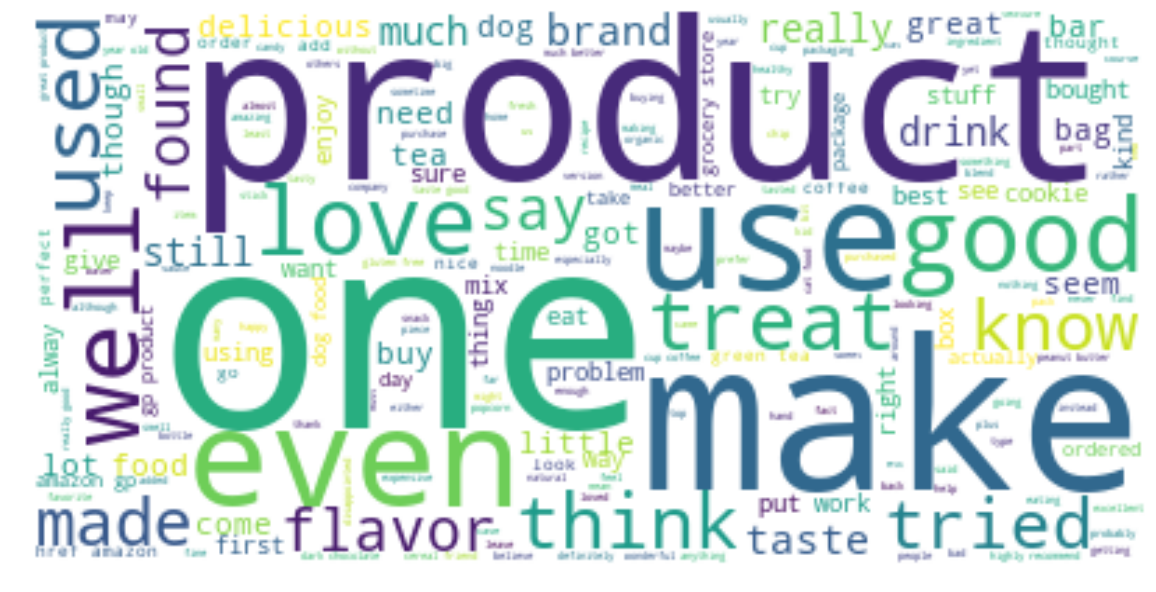

In [40]:
#Try to visualize words
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(background_color="white").generate(" ".join(flat_list))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

In [41]:
#Most common Adj

tagged_sent = pos_tag(flat_list)
adj = [word for word,pos in tagged_sent if pos == 'JJ']
flat_list = [item for item in adj]
c = Counter(flat_list)
print(c.most_common(10))

[('good', 34685), ('great', 28906), ('little', 13904), ('much', 10950), ('many', 7431), ('delicious', 7033), ('sweet', 6981), ('nice', 6738), ('hot', 6558), ('small', 6273)]


(-0.5, 399.5, 199.5, -0.5)

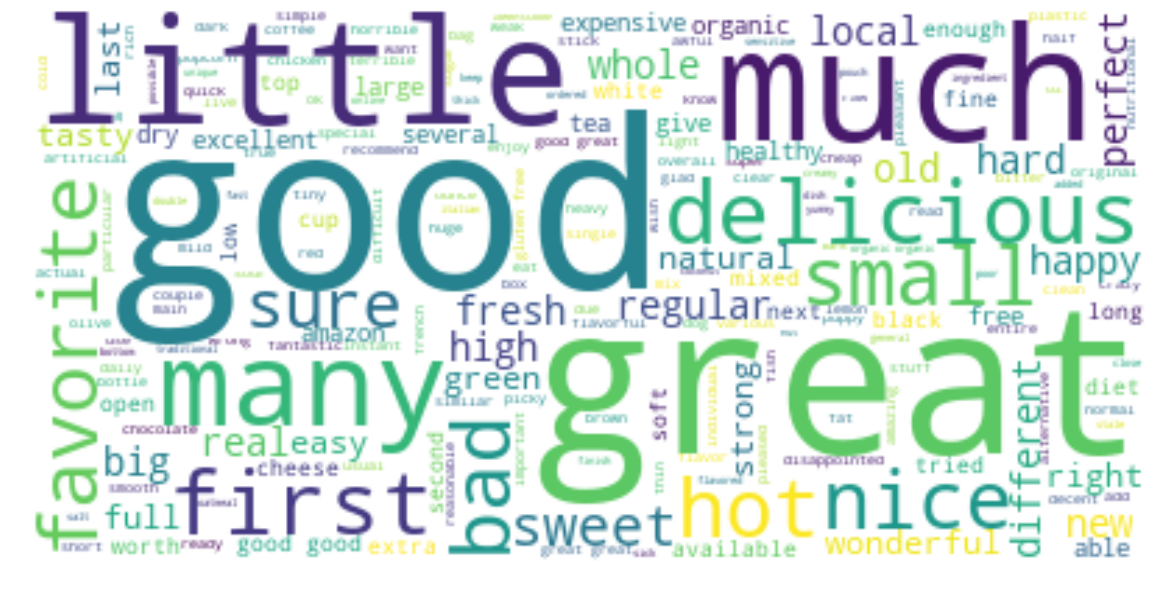

In [42]:
#Wordcloud degli aggettivi più frequenti
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(background_color="white").generate(" ".join(flat_list))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

In [17]:
#applichiamo lo stemming
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()

text_tokenized_stem = text_tokenized_stop_punct.apply(lambda x: [lancaster_stemmer.stem(item) for item in x])
text_tokenized_stem

0        [bought, sev, vit, can, dog, food, produc, fou...
1        [produc, ar, label, jumbo, salt, peanut, ..., ...
2        [confect, around, century, light, pillowy, cit...
3        [look, secret, ingredy, robitussin, believ, fo...
4        [gre, taffy, gre, pric, wid, assort, yummy, ta...
5        [got, wild, hair, taffy, ord, fiv, pound, bag,...
6        [saltw, taffy, gre, flav, soft, chewy, candy, ...
7        [taffy, good, soft, chewy, flav, amaz, would, ...
8        [right, most, sprouting, cat, eat, grass, lov,...
9        [healthy, dog, food, good, digest, also, good,...
10       [know, cact, tequil, un, combin, ingredy, flav...
11       [on, boy, nee, los, weight, n't, put, food, fl...
12       [cat, happy, eat, felida, platin, two, year, g...
13       [good, flav, cam, sec, pack, ..., fresh, delic...
14       [strawberry, twizzl, guil, pleas, yummy, six, ...
15       [daught, lov, twizzl, ship, six, pound, real, ...
16       [lov, eat, good, watch, tv, look, movy, sweet,.

In [18]:
#ri valutiamo le parole più frequenti
sentences = (list(itertools.chain(text_tokenized_stem)))
flat_list = [item for sublist in sentences for item in sublist]
c = Counter(flat_list)
c.most_common(10)

[('lik', 52181),
 ('tast', 46370),
 ('us', 38436),
 ('flav', 38371),
 ('good', 36340),
 ('on', 34342),
 ('lov', 33986),
 ('produc', 32763),
 ('would', 29582),
 ('gre', 29239)]

(-0.5, 399.5, 199.5, -0.5)

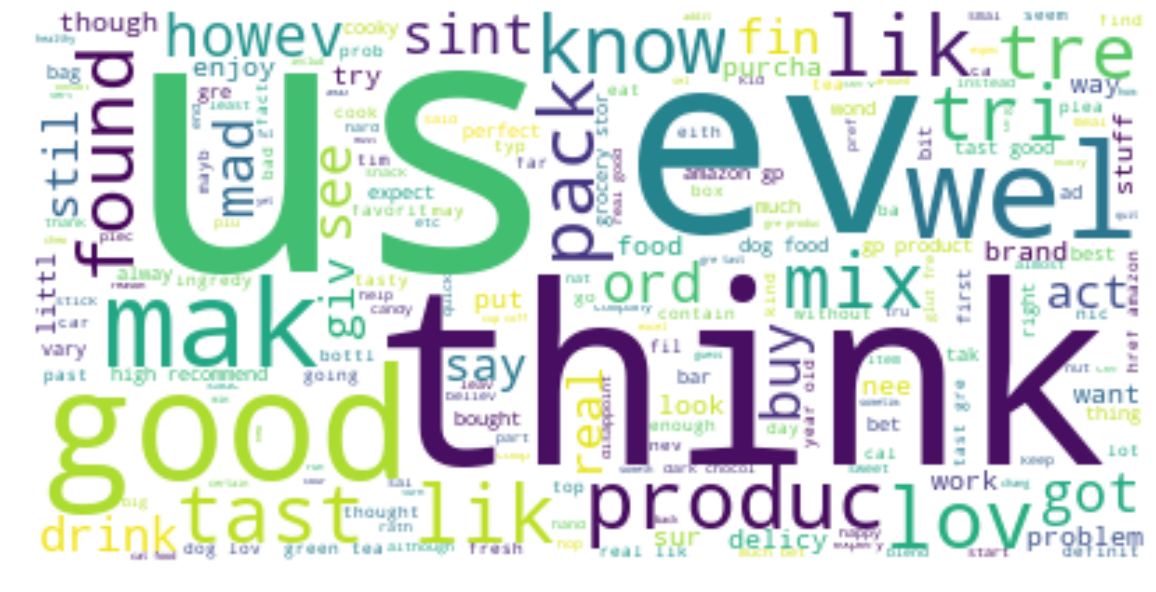

In [19]:
#Try to visualize again words
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(background_color="white").generate(" ".join(flat_list))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

In [21]:
#Analisi dei punteggi
df['score'].groupby(df['score']).count()

score
1     9318
2     5568
3     8059
4    14643
5    62412
Name: score, dtype: int64

In [22]:
df.loc[df['score'] == 1]

,productid,userid,profile,helpfulNum,helpfulDen,score,text,time,year,clean_text,tokenized,tokenized_clean
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,product arrived labeled as jumbo salted peanut...,2012-09-07,2012,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, as, jumbo, salted,..."
12,B0009XLVG0,A327PCT23YH90,LT,1,1,1,my cats have been happily eating felidae plati...,2012-06-13,2012,my cats have been happily eating felidae plati...,"[my, cats, have, been, happily, eating, felida...","[my, cats, have, been, happily, eating, felida..."
26,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,"the candy is just red , no flavor . just plan...",2012-03-25,2012,"the candy is just red , no flavor . just plan ...","[the, candy, is, just, red, ,, no, flavor, ., ...","[the, candy, is, just, red, ,, no, flavor, ., ..."
50,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,"this oatmeal is not good. its mushy, soft, i d...",2008-02-19,2008,"this oatmeal is not good. its mushy, soft, i d...","[this, oatmeal, is, not, good, ., its, mushy, ...","[this, oatmeal, is, not, good, ., its, mushy, ..."
62,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,arrived in 6 days and were so stale i could no...,2008-07-06,2008,arrived in 6 days and were so stale i could no...,"[arrived, in, 6, days, and, were, so, stale, i...","[arrived, in, 6, days, and, were, so, stale, i..."
73,B0059WXJKM,A25VFHVGI4CFTP,Diana Robinson,0,1,1,buyer beware please! this sweetener is not for...,2012-04-30,2012,buyer beware please! this sweetener is not for...,"[buyer, beware, please, !, this, sweetener, is...","[buyer, beware, please, !, this, sweetener, is..."
75,B001EPPI84,A27TZ4WBU7N0YF,I. So,0,0,1,no tea flavor at all. just whole brunch of art...,2010-05-28,2010,no tea flavor at all. just whole brunch of art...,"[no, tea, flavor, at, all, ., just, whole, bru...","[no, tea, flavor, at, all, ., just, whole, bru..."
99,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,i fed this to my golden retriever and he hated...,2012-03-08,2012,i fed this to my golden retriever and he hated...,"[i, fed, this, to, my, golden, retriever, and,...","[i, fed, this, to, my, golden, retriever, and,..."
153,B002HQAXUW,A17ESTP5T7T1PH,Bumbeda1,1,1,1,these singles sell for $2.50 - $3.36 at the st...,2011-12-27,2011,these singles sell for $2.50 - $3.36 at the st...,"[these, singles, sell, for, $, 2.50, -, $, 3.3...","[these, singles, sell, for, $, 2.50, -, $, 3.3..."
164,B000ITVLE2,ARTBQH9WOZTIV,"Billy Wilson ""amzrview""",0,4,1,seriously this product was as tasteless as the...,2010-03-22,2010,seriously this product was as tasteless as the...,"[seriously, this, product, was, as, tasteless,...","[seriously, this, product, was, as, tasteless,..."


In [23]:
products_score = df.groupby('productid')['score'].mean()
temp = products_score.to_frame()
five = temp[temp['score']==5]
five.count()

score    5056
dtype: int64

In [24]:
one = temp[temp['score']==1]
one.count()

score    627
dtype: int64

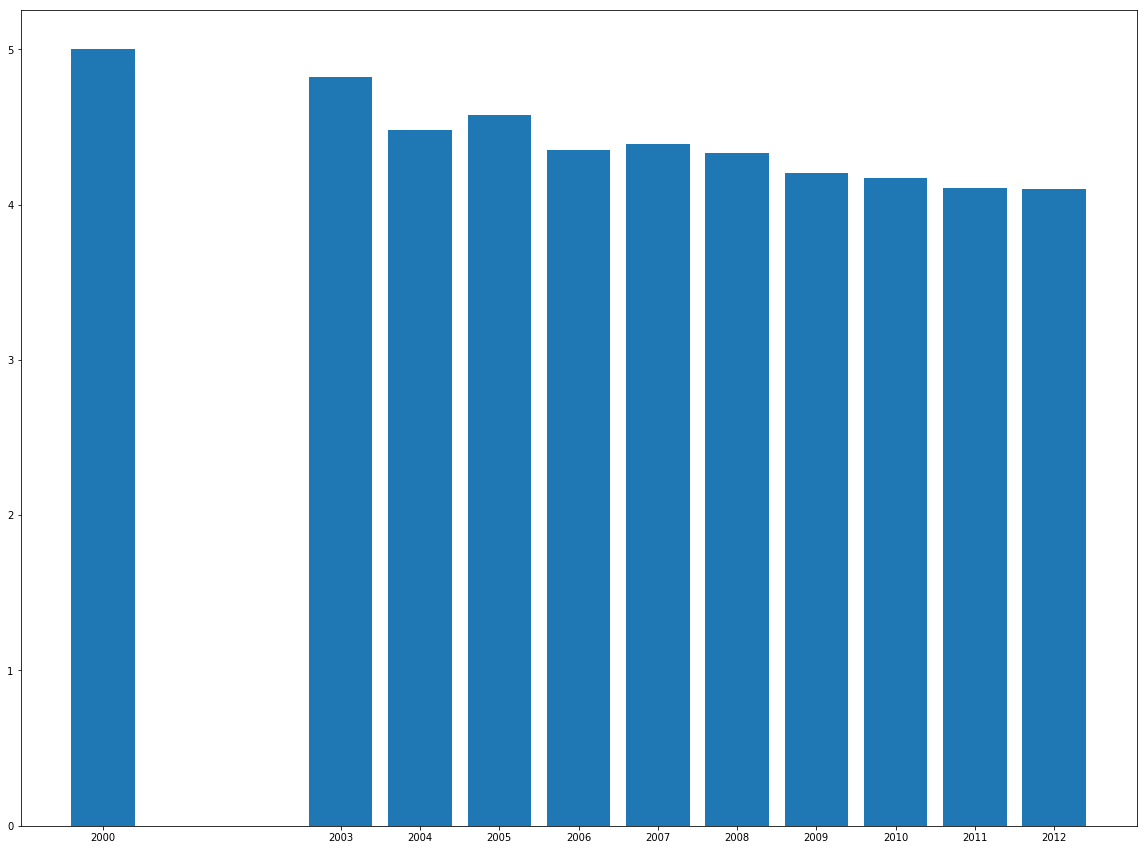

In [28]:
def score_by_year():
	df = pd.read_csv('reviews_small_timed.csv')
	years = df.year
	seen = set()
	for e in years:
		if(e not in seen):
			seen.add(e)
		
	print('\n\n\n\n')
	
	names = []
	for e in seen:
		names.append(e)
	#print(names)
	
	products_score = []
	groups = df.sort_values('year', ascending=False).groupby('year')['score'].mean()
	temp = groups.to_frame()
	#print(temp)
	for row in groups:
		products_score.append(row)

	plt.figure(figsize=(20, 15))
	plt.bar(names, products_score)
	plt.xticks(names)
	#plt.yticks(products_score)
	plt.show()
	#this plot shows the distribution of the score by year

score_by_year()